In [23]:
# import necessary libaries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model import *


In [24]:
# To read the datasets.

df=pd.read_csv('car_prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
# To know the datatypes of the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [26]:
# To know the mathematical parameters of count,mean,std,min,max,etc.....

df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [27]:
# To know only for categorical datatypes.

df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [28]:
# Check for the null values in the dataset.

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
# there is no null values to treat for the dataset to perform the EDA.


In [30]:
# Data Preprocessing

df['CompanyName'] = df['CarName'].str.split(' ',expand=True)[0]
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [31]:
# Function to replace the company name properily

def replace(a,b):
    df['CompanyName'].replace(a,b,inplace=True)
    
    
replace('maxda', 'mazda')
replace('vokswagen', 'volkswagen')
replace('vw', 'volkswagen')
replace( 'Nissan', 'nissan')
replace( 'porcshce','porsche')

In [32]:
replace('toyouta','toyota')

In [33]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [34]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


In [35]:
# Dropping the unwanted columns in the dataset.

df.drop('car_ID',axis=1,inplace=True)
df.drop('CarName',axis=1,inplace=True)


In [36]:
df['symboling']=df['symboling'].astype('object')

In [37]:
# To check the skewness for the numerical columns.

df.select_dtypes(include=np.number).skew()

wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [38]:
# To know the value_counts for the categorical columns.

for i in df.select_dtypes(exclude=np.number).columns:
    print(df[i].value_counts())
    print()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

CompanyName
toyota         32
nissan         18
mazda       

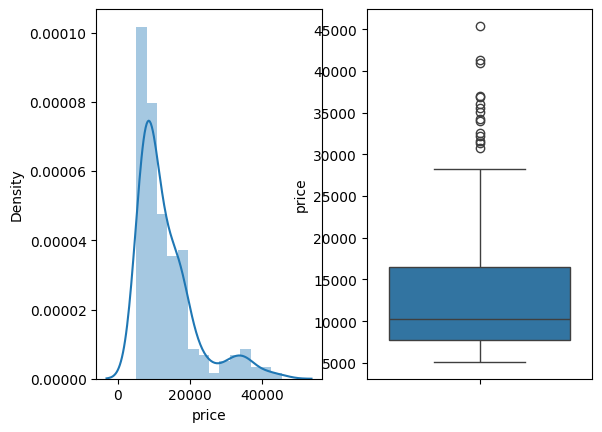

In [39]:
# Plot on target 

plt.subplot(1,2,1)
sns.distplot(df['price'])

plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.show()

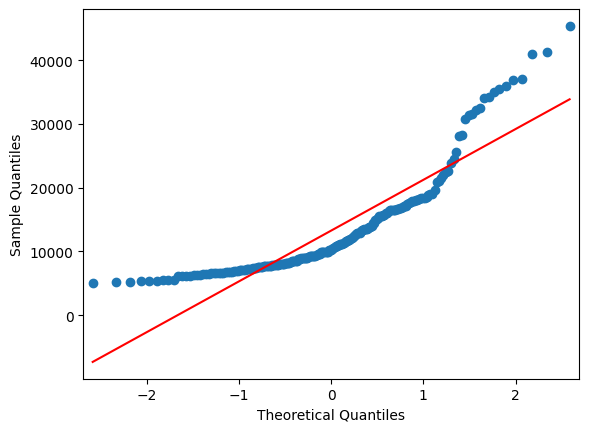

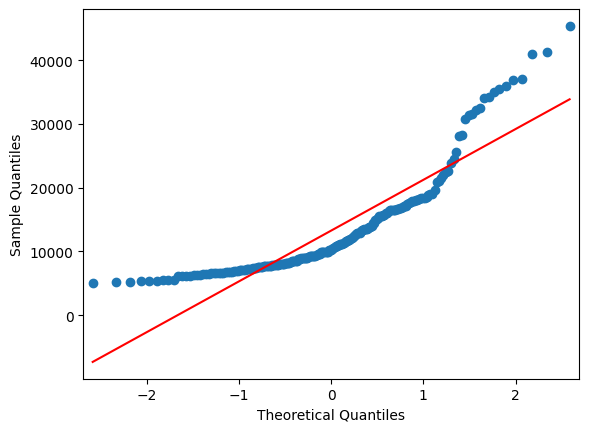

In [40]:
import statsmodels.api as sm
sm.qqplot(df['price'],line='s')

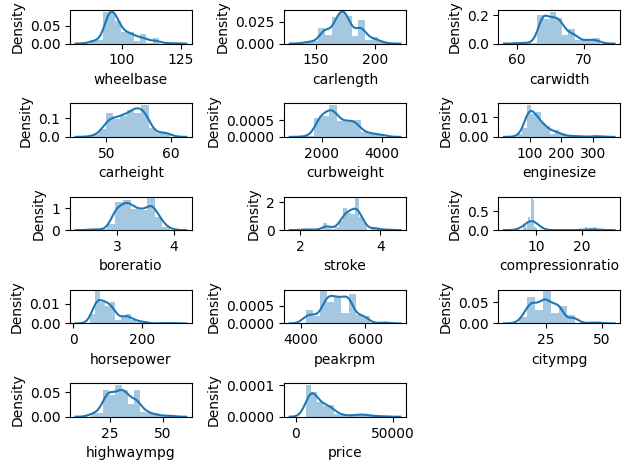

In [41]:
# Univarient Analysis

t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(5,3,t)
    sns.distplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [42]:
df.select_dtypes(exclude=np.number).columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CompanyName'],
      dtype='object')

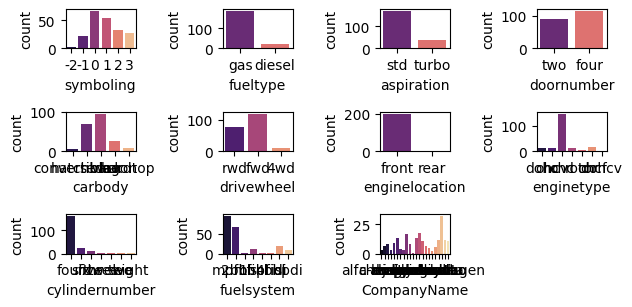

In [43]:
t=1
for i in df.select_dtypes(exclude=np.number).columns:
    plt.subplot(5,4,t)
    sns.countplot(x=df[i],palette='magma')
    t+=1
plt.tight_layout()
plt.show()

In [44]:
dff=df.drop('price',axis=1)

In [45]:
num = dff.select_dtypes(include=np.number).columns.to_list()
num

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

<Axes: >

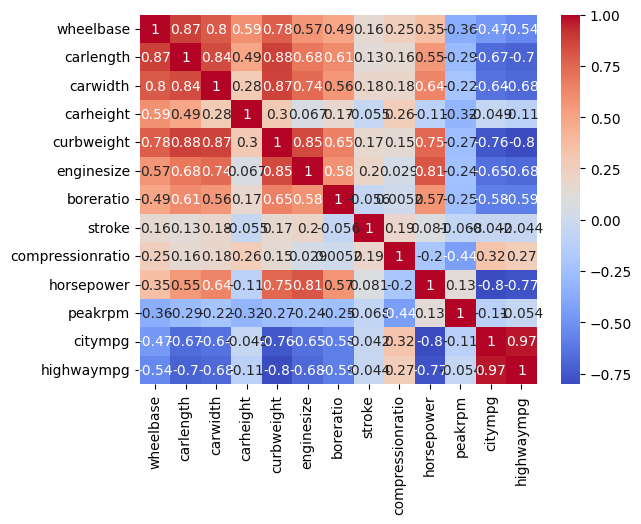

In [46]:
# To check for the correlation

sns.heatmap(dff[num].corr(),annot=True,cmap='coolwarm')

In [ ]:
# feature engineering

# to get the fuel economy we can combine citympg and highwaympg column considering 
# 65% in cidf['fueleconomy'] = (0.65 * df['citympg']) + (0.35 * df['highwaympg'])tympg and 35% in highwaympg


In [47]:
df['fueleconomy'] = (0.65 * df['citympg']) + (0.35 * df['highwaympg'])

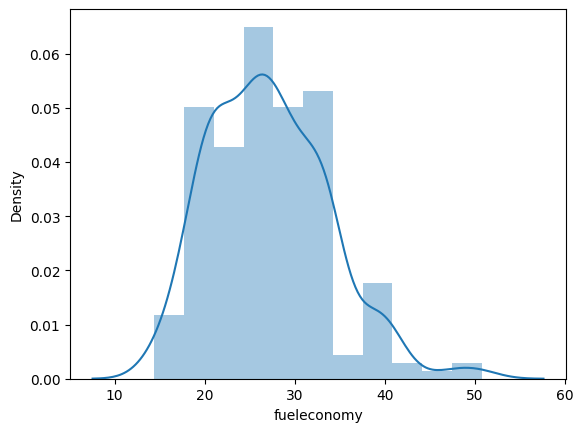

In [48]:
sns.distplot(df['fueleconomy'])
plt.show()

In [49]:
df['price'] = df['price'].astype(int)


In [50]:
df.groupby(by='CompanyName')[['price']].mean()

,price
CompanyName,
alfa-romero,15498.333333
audi,17859.142857
bmw,26118.750000
buick,33647.000000
chevrolet,6007.000000
dodge,7875.444444
honda,8184.692308
isuzu,8916.250000
jaguar,34600.000000


In [51]:
bins = [0,20000,30000,50000]
car_cat = ['budget_friendly','medium','higher']

In [52]:
df['car_price_range'] = pd.cut(df['price'],right=False,bins=bins,labels = car_cat)

In [53]:
df['car_price_range'].value_counts()

car_price_range
budget_friendly    179
higher              15
medium              11
Name: count, dtype: int64

In [54]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName',
       'fueleconomy', 'car_price_range'],
      dtype='object')

In [55]:
# Encoding

def replace(a,b):
    df['car_price_range'].replace(a,b,inplace=True)

In [56]:
replace('budget_friendly',-1)
replace('medium',0)
replace('higher',1)

In [57]:
df['car_price_range'].value_counts()

car_price_range
-1    179
1      15
0      11
Name: count, dtype: int64

In [58]:
df['symboling']=df['symboling'].astype(int)

In [59]:
def replace(a,b):
    df['cylindernumber'].replace(a,b,inplace=True)

In [60]:
replace('two',2)
replace('three',3)
replace('four',4)
replace('five',5)
replace('six',6)
replace('eight',8)
replace('twelve',12)

In [61]:
df['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [62]:
def replace(a,b):
    df['doornumber'].replace(a,b,inplace=True)

In [63]:
replace('two',2)
replace('four',4)

In [64]:
df['doornumber'].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [65]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy,car_price_range
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.10,-1
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.10,-1
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,21.45,-1
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950,audi,26.10,-1
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450,audi,19.40,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845,volvo,24.75,-1
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045,volvo,21.10,-1
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485,volvo,19.75,0
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470,volvo,26.35,0


In [66]:
l=LabelEncoder()
df['CompanyName']=l.fit_transform(df['CompanyName'])

In [67]:
df['car_price_range']=df['car_price_range'].astype(float)

In [69]:
encode=df.select_dtypes(exclude=np.number).columns.to_list()
encode

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [70]:
# Dummies

df_final=pd.get_dummies(df,columns=encode,drop_first=True,dtype=int)

In [71]:
# Transformation

trans=['compressionratio','wheelbase','carwidth','curbweight','enginesize','horsepower','citympg','stroke','highwaympg']

In [72]:
p=PowerTransformer()

In [73]:
df_final[trans]=p.fit_transform(df_final[trans])

In [74]:
df_final[num].skew()

wheelbase          -0.003485
carlength           0.155954
carwidth            0.000000
carheight           0.063123
curbweight          0.024871
enginesize         -0.002542
boreratio           0.020156
stroke              0.112143
compressionratio    0.034222
horsepower          0.049318
peakrpm             0.075159
citympg             0.001615
highwaympg         -0.000526
dtype: float64

In [75]:
df_final

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,-2.402418,168.8,-6.661338e-16,48.8,0.144823,4,0.380332,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,-2.402418,168.8,-6.661338e-16,48.8,0.144823,4,0.380332,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,-0.699849,171.2,-2.775558e-17,52.4,0.647098,6,0.890484,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,0.365001,176.6,2.220446e-16,54.3,-0.303501,4,-0.294503,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,0.296266,176.6,3.053113e-16,54.3,0.648780,5,0.535529,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,1.579616,188.8,1.082467e-15,55.5,0.856578,4,0.654949,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4,1.579616,188.8,1.054712e-15,55.5,1.004682,4,0.654949,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4,1.579616,188.8,1.082467e-15,55.5,0.949090,6,1.258269,3.58,...,0,1,0,0,0,0,0,1,0,0
203,-1,4,1.579616,188.8,1.082467e-15,55.5,1.244126,6,0.744658,3.01,...,0,0,0,0,0,1,0,0,0,0


In [76]:
# Train Test Split

x=df_final.drop('price',axis=1)
y=df[['price']]

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=1)

In [78]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(143, 41)
(62, 41)
(143, 1)
(62, 1)


In [ ]:
# stats test to find whether train and test represent the overall data

# Ho: Both train and test represent overall data
# Ha: Both train and test does not represent overall data

In [82]:
from scipy import stats

def ttest_ind(train,test,feature):
    stat,pval=stats.ttest_ind(train[feature],test[feature])
    return pval

In [83]:
for i in xtrain.columns:
    pvalue=ttest_ind(xtrain,xtest,i)
    print(i,pvalue)

symboling 0.8759692581563854
doornumber 0.1443878810413309
wheelbase 0.9909618497097338
carlength 0.23934352879463708
carwidth 0.16450208672911848
carheight 0.9181448145769309
curbweight 0.24527742754217868
cylindernumber 0.10312325588787971
enginesize 0.19020481570970404
boreratio 0.5290078683566211
stroke 0.02932044041887761
compressionratio 0.9692069887850986
horsepower 0.14318549775092604
peakrpm 0.8469734494748274
citympg 0.17751964997143962
highwaympg 0.19928687613645507
CompanyName 0.5726739437306481
fueleconomy 0.17511202268802636
car_price_range 0.5120336526098922
fueltype_gas 0.6279398325712917
aspiration_turbo 0.7503020855266428
carbody_hardtop 0.6504510182506538
carbody_hatchback 0.2214595216632896
carbody_sedan 0.5376515143584972
carbody_wagon 0.4706675589545809
drivewheel_fwd 0.40585290769219207
drivewheel_rwd 0.5342630726915953
enginelocation_rear 0.25273156352530984
enginetype_dohcv 0.5115780684998885
enginetype_l 0.3770780703824558
enginetype_ohc 0.4497762714655569
eng

In [84]:
xtrain.max()-xtrain.min()

symboling              5.000000e+00
doornumber             2.000000e+00
wheelbase              5.271980e+00
carlength              5.800000e+01
carwidth               3.802514e-15
carheight              1.200000e+01
curbweight             4.324790e+00
cylindernumber         1.000000e+01
enginesize             5.112272e+00
boreratio              1.400000e+00
stroke                 6.637222e+00
compressionratio       4.918111e+00
horsepower             4.335086e+00
peakrpm                2.450000e+03
citympg                5.166370e+00
highwaympg             5.428297e+00
CompanyName            2.100000e+01
fueleconomy            3.635000e+01
car_price_range        2.000000e+00
fueltype_gas           1.000000e+00
aspiration_turbo       1.000000e+00
carbody_hardtop        1.000000e+00
carbody_hatchback      1.000000e+00
carbody_sedan          1.000000e+00
carbody_wagon          1.000000e+00
drivewheel_fwd         1.000000e+00
drivewheel_rwd         1.000000e+00
enginelocation_rear    1.000

In [85]:
pd.set_option('display.max_columns',None)

In [86]:
xtrain.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName,fueleconomy,car_price_range,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
124,3,2,-0.383332,173.2,2.498002e-16,50.2,0.638670,4,0.968037,3.59,2.213116,-2.713927,1.147402,5000,-0.977418,-0.998961,14,20.75,-1.0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
181,-1,4,1.060397,187.8,3.330669e-16,54.1,1.152498,6,1.059651,3.27,0.245662,0.139651,1.315353,5200,-0.977418,-0.998961,19,20.75,-1.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
154,0,4,-0.426838,169.7,-9.159340e-16,59.1,-0.412292,4,-1.061097,3.05,-0.779209,-0.014205,-1.460225,4800,0.394611,0.270559,19,28.75,-1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
53,1,4,-1.046129,166.8,-6.106227e-16,54.1,-1.336608,4,-1.114909,3.03,-0.412843,-0.014205,-1.108154,5000,0.933598,1.061201,9,33.45,-1.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
94,1,2,-0.699849,165.3,-8.049117e-16,54.5,-1.318321,4,-0.808333,3.15,0.041699,0.280661,-1.054264,5200,0.933598,0.936915,12,33.10,-1.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [87]:
scale=['carlength','carheight','peakrpm','fueleconomy']

In [88]:
# Scaling

s=StandardScaler()
xtrain[scale]=s.fit_transform(xtrain[scale])
xtest[scale]=s.transform(xtest[scale])

In [89]:
# Base Model

xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)

In [90]:
basemodel=sm.OLS(ytrain,xtrain_c).fit()

In [91]:
print(basemodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     83.90
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           8.18e-63
Time:                        11:25:25   Log-Likelihood:                -1244.2
No. Observations:                 143   AIC:                             2564.
Df Residuals:                     105   BIC:                             2677.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.009e+04   3

In [93]:
basemodel.pvalues<0.05

const                   True
symboling               True
doornumber             False
wheelbase               True
carlength              False
carwidth                True
carheight              False
curbweight              True
cylindernumber         False
enginesize             False
boreratio              False
stroke                 False
compressionratio       False
horsepower             False
peakrpm                False
citympg                 True
highwaympg              True
CompanyName             True
fueleconomy             True
car_price_range         True
fueltype_gas           False
aspiration_turbo       False
carbody_hardtop        False
carbody_hatchback       True
carbody_sedan           True
carbody_wagon           True
drivewheel_fwd         False
drivewheel_rwd         False
enginelocation_rear     True
enginetype_dohcv       False
enginetype_l            True
enginetype_ohc         False
enginetype_ohcf        False
enginetype_ohcv        False
enginetype_rot

In [94]:
cl=xtrain_c.columns.to_list()
cl

['const',
 'symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'CompanyName',
 'fueleconomy',
 'car_price_range',
 'fueltype_gas',
 'aspiration_turbo',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


vif=[VIF(xtrain_c.values,i) for i in range(xtrain_c.shape[1])]
vif_df=pd.DataFrame(vif,index=cl,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
fueltype_gas,inf
fuelsystem_idi,inf
fuelsystem_4bbl,inf
enginetype_rotor,inf
fueleconomy,139.770105
citympg,126.293617
highwaympg,60.108271
enginesize,50.394827
horsepower,41.728965
curbweight,31.231883


In [97]:
# Feature Selection

from sklearn.feature_selection import RFE


lr=LinearRegression()
rfe=RFE(estimator=lr,n_features_to_select=7)
rfe.fit(xtrain_c,ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [98]:
r=rfe.ranking_
r

array([31, 17, 24, 12, 32, 35, 22,  3, 21, 14, 25, 29, 30, 13, 34,  1,  1,
       28,  1,  1,  5, 23,  9,  7,  8,  6, 19, 11,  1, 26, 10, 18, 33, 16,
        4, 27,  1,  1, 36, 20,  2, 15])

In [99]:
rank=pd.DataFrame(r,index=cl,columns=['Rank based on RFE'])
rank.sort_values(by='Rank based on RFE')

,Rank based on RFE
car_price_range,1
fuelsystem_idi,1
fuelsystem_4bbl,1
highwaympg,1
enginelocation_rear,1
citympg,1
fueleconomy,1
fuelsystem_spdi,2
curbweight,3
enginetype_rotor,4


In [100]:
selected=rank[rank['Rank based on RFE']==1].index.to_list()
selected

['citympg',
 'highwaympg',
 'fueleconomy',
 'car_price_range',
 'enginelocation_rear',
 'fuelsystem_4bbl',
 'fuelsystem_idi']

In [101]:
# New train and test using above columns

xtrain_new=xtrain_c[selected]
xtest_new=xtest_c[selected]

In [103]:
# Finding VIF for the above data

vif=[VIF(xtrain_new.values,i)for i in range(xtrain_new.shape[1])]
vif_df=pd.DataFrame(vif,index=selected,columns=['VIF'])
vif_df

,VIF
citympg,34.139954
highwaympg,21.278328
fueleconomy,44.390570
car_price_range,1.160211
enginelocation_rear,1.192455
fuelsystem_4bbl,1.078471
fuelsystem_idi,1.197786


In [104]:
vif_df.index

Index(['citympg', 'highwaympg', 'fueleconomy', 'car_price_range',
       'enginelocation_rear', 'fuelsystem_4bbl', 'fuelsystem_idi'],
      dtype='object')

In [105]:
xtrain_final=xtrain[['highwaympg', 'fueleconomy', 'car_price_range',
       'enginelocation_rear', 'fuelsystem_4bbl', 'fuelsystem_idi']]

xtest_final=xtest[['highwaympg', 'fueleconomy', 'car_price_range',
       'enginelocation_rear', 'fuelsystem_4bbl', 'fuelsystem_idi']]

In [106]:
xtrain_final=sm.add_constant(xtrain_final)
xtest_final=sm.add_constant(xtest_final)

In [107]:
model2=sm.OLS(ytrain,xtrain_final).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           5.47e-68
Time:                        11:48:25   Log-Likelihood:                -1317.9
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     136   BIC:                             2671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.958e+04    

In [108]:
ccc=xtrain_final.columns.to_list()

In [110]:
vif=[VIF(xtrain_new.values,i) for i in range(xtrain_new.shape[1])]
vif_df=pd.DataFrame(vif,index=ccc,columns=['VIF'])
vif_df

,VIF
const,34.139954
highwaympg,21.278328
fueleconomy,44.390570
car_price_range,1.160211
enginelocation_rear,1.192455
fuelsystem_4bbl,1.078471
fuelsystem_idi,1.197786


In [111]:
xtrain_final=xtrain_final.drop('fueleconomy',axis=1)
xtest_final=xtest_final.drop('fueleconomy',axis=1)

In [113]:
# Ridge

model3=Ridge()
model3.fit(xtrain_final,ytrain)

Ridge()

In [114]:
ypred=model3.predict(xtest_final)

r2_score(ypred,ytest)

0.8723748231413734

In [115]:
mean_absolute_error(ypred,ytest)

1808.7393595361882

In [116]:
mean_squared_error(ypred,ytest)

6206031.3209302025

In [117]:
mean_absolute_percentage_error(ypred,ytest)

0.20828151290264696

In [118]:
# Lasso

model4=Lasso()

model4.fit(xtrain_final,ytrain)

Lasso()

In [119]:
ypred=model4.predict(xtest_final)

r2_score(ypred,ytest)

0.875591690471942

In [120]:
mean_absolute_error(ypred,ytest)

1772.7672246773066

In [121]:
mean_squared_error(ypred,ytest)

6154472.535973173

In [122]:
mean_absolute_percentage_error(ypred,ytest)

0.2173137363332844

In [123]:
# Random Forest

rf=RandomForestRegressor()
rf.fit(xtrain_final,ytrain)

RandomForestRegressor()

In [124]:
ypred=rf.predict(xtest_final)
r2_score(ypred,ytest)

0.9005760582659555

In [125]:
mean_absolute_error(ypred,ytest)

1589.853957223882

In [126]:
mean_squared_error(ypred,ytest)

5273392.426330409

In [127]:
mean_absolute_percentage_error(ypred,ytest)

0.1400810177916918

In [128]:
# Boosting

gra=GradientBoostingRegressor()
gra.fit(xtrain_final,ytrain)

GradientBoostingRegressor()

In [130]:
ypred=gra.predict(xtest_final)
r2_score(ypred,ytest)

0.900289150611414

In [131]:
mean_absolute_error(ypred,ytest)

1580.6032868079837

In [132]:
mean_squared_error(ypred,ytest)

5701607.846609639

In [133]:
mean_absolute_percentage_error(ypred,ytest)

0.13255315928598113

In [135]:
# AdaBoost

ada=AdaBoostRegressor()
ada.fit(xtrain_final,ytrain)

AdaBoostRegressor()

In [137]:
ypred=ada.predict(xtest_final)

r2_score(ypred,ytest)

0.8528638634603956

In [138]:
mean_absolute_error(ypred,ytest)

2101.480787140616

In [139]:
mean_squared_error(ypred,ytest)

7984821.883014011

In [140]:
mean_absolute_percentage_error(ypred,ytest)

0.18897092550423467